# Exploratory Data Analysis: Synthetic Clinical Dataset

In the next sections, we’ll begin exploring the high-priority CSVs, starting with `patients.csv`, to understand the structure and potential insights from each file.

## Core Dataset Files (High Priority)

These CSV files are **central to our analysis pipeline** and will be the focus of our modeling and dashboarding efforts:

| File               | Purpose                                                                 |
|--------------------|-------------------------------------------------------------------------|
| `patients.csv`      | Central table with demographic info (age, gender, race, etc.). Used for cohorting and filtering populations. |
| `conditions.csv`    | Contains diagnoses — used to flag chronic conditions and trial eligibility. |
| `encounters.csv`    | Tracks each visit or interaction with healthcare providers. Crucial for identifying care frequency and missed visits. |
| `procedures.csv`    | Records completed or missed screenings, surgeries, and diagnostic events. |
| `medications.csv`   | Tracks prescriptions, which helps monitor medication adherence or treatment gaps. |
| `observations.csv`  | Includes lab/test results and vitals — valuable for eligibility and clinical progress tracking. |
| `careplans.csv`     | Captures long-term plans (e.g., diabetes, oncology). Used to identify gaps or deviation in care. |
| `immunizations.csv` | Key for preventive care compliance (e.g., flu shots, childhood vaccines). |

---

## Supplementary Files (Medium Priority)

These files provide **contextual or supporting information** and may be used for slicing, filtering, or grouping:

| File                | Purpose                                                                 |
|---------------------|--------------------------------------------------------------------------|
| `organizations.csv`  | Links providers and patients to facilities. Useful for health system filtering. |
| `providers.csv`      | Associates encounters and procedures with specific clinicians. Supports drill-down analysis. |

---

## Advanced or Conditional Use (Optional)

These files are only needed for **specialized use cases**, such as billing analysis or insurance-related insights:

| File                      | Use Case                                                             |
|---------------------------|----------------------------------------------------------------------|
| `claims.csv`              | Real-world billing behavior or cost modeling                        |
| `claims_transactions.csv` | Granular details on claim events                                    |
| `devices.csv`             | Tracking implanted devices or assistive technologies                |
| `payer_transitions.csv`   | Simulating insurance changes and access to care                     |
| `payers.csv`              | Analyzing trends by payer or insurance coverage                     |
| `suppliers.csv`           | Niche supply chain-related use cases                                |
| `allergies.csv`           | Relevant only for modeling adverse reactions or contraindications    |

---




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
DATA_PATH = "S:\Github\clinical-care-dashboard\synthea\output\csv"

patients = pd.read_csv(os.path.join(DATA_PATH, "patients.csv"))
encounters = pd.read_csv(os.path.join(DATA_PATH, "encounters.csv"))
conditions = pd.read_csv(os.path.join(DATA_PATH, "conditions.csv"))
procedures = pd.read_csv(os.path.join(DATA_PATH, "procedures.csv"))
medications = pd.read_csv(os.path.join(DATA_PATH, "medications.csv"))
observations = pd.read_csv(os.path.join(DATA_PATH, "observations.csv"))
careplans = pd.read_csv(os.path.join(DATA_PATH, "careplans.csv"))
immunizations = pd.read_csv(os.path.join(DATA_PATH, "immunizations.csv"))

In [13]:
patients.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,3f6021df-8aac-ed27-a705-e71bc0e4b649,2008-08-08,2015-02-23,999-26-5091,NaN,NaN,NaN,Xavier983,NaN,Ratke343,...,Revere,Massachusetts,Suffolk County,25025.0,2151,42.383971,-70.985513,1344.31,42314.96,22038
1,1f84d0f1-976e-1a46-e50e-f5d3d421f41a,2018-09-01,NaN,999-98-9171,NaN,NaN,NaN,Leonardo412,Julian715,Feeney44,...,Quincy,Massachusetts,Norfolk County,25021.0,2169,42.275612,-70.992888,18340.55,0.00,103247
2,8c85983a-a538-522f-bce0-03678b0fc7ce,2016-09-26,NaN,999-54-6293,NaN,NaN,NaN,Josiah310,NaN,Schaden604,...,Newburyport,Massachusetts,Essex County,25009.0,1950,42.796728,-70.931792,27237.65,10680.83,878354
3,39a59f42-5a52-886d-844b-183228219521,2006-03-24,NaN,999-23-7837,S99911725,NaN,Ms.,Vonda514,NaN,Littel644,...,Worcester,Massachusetts,Worcester County,25027.0,1602,42.177419,-71.744878,69883.10,61068.29,95959
4,1e621f4c-db30-c273-49e9-2dcad508a9cb,2009-07-03,NaN,999-35-9473,NaN,NaN,NaN,Jessie665,Foster87,Glover433,...,Whitman,Massachusetts,Plymouth County,NaN,0,42.109574,-70.923250,25323.18,740.03,102779


Create functions to use for each csv file starting with patients

In [44]:
import os

def explore_csv(df: pd.DataFrame, name: str = "DataFrame", output_path: str = "./"):
    print(f"\n--- Exploring {name} ---\n")
    
    # Ensure output path exists
    os.makedirs(output_path, exist_ok=True)

    file_path = os.path.join(output_path, f"{name.lower().replace(' ', '_')}_eda.txt")
    
    with open(file_path, mode='w', encoding='utf-8') as temp_file:
        temp_file.write(f"EDA Report for: {name}\n")
        temp_file.write("=" * 50 + "\n\n")
        
        temp_file.write("Basic Info:\n")
        temp_file.write(f"Shape: {df.shape}\n")
        temp_file.write(f"Columns: {list(df.columns)}\n")
        temp_file.write(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB\n\n")
        
        temp_file.write("Data Types:\n")
        temp_file.write(str(df.dtypes) + "\n\n")

        # Column type distribution
        temp_file.write("Column Type Distribution:\n")
        temp_file.write(f"Numerical: {df.select_dtypes(include='number').shape[1]}\n")
        temp_file.write(f"Categorical: {df.select_dtypes(include='object').shape[1]}\n")
        temp_file.write(f"Datetime: {df.select_dtypes(include='datetime').shape[1]}\n\n")

        # Duplicate rows
        duplicate_rows = df[df.duplicated()]
        temp_file.write(f"Number of duplicate rows: {duplicate_rows.shape[0]}\n\n")

        # Null values
        nulls = df.isnull().sum()
        nulls_with_values = nulls[lambda x: x > 0]
        if not nulls_with_values.empty:
            temp_file.write("Columns with null values:\n")
            temp_file.write(str(nulls_with_values) + "\n\n")
        else:
            temp_file.write("No columns with null values.\n\n")

        # Unique values per column
        temp_file.write("Unique Values per Column:\n")
        for col in df.columns:
            temp_file.write(f"{col}: {df[col].nunique()} unique values\n")
        temp_file.write("\n")

        # Cardinality warnings
        temp_file.write("Potential High Cardinality Columns (nunique > 1000):\n")
        high_card_cols = df.columns[df.nunique() > 1000]
        if not high_card_cols.empty:
            temp_file.write(", ".join(high_card_cols) + "\n\n")
        else:
            temp_file.write("None\n\n")

        # Summary statistics for numericals
        temp_file.write("Summary Statistics for Numerical Columns:\n")
        temp_file.write(str(df.describe().transpose()) + "\n\n")

        
    return file_path



In [82]:
def plot_boxplots(df, figsize=(16, 4)):
    """
    Displays boxplots for all numerical columns in the DataFrame in rows with two plots per row.
    The boxplots are styled with improved colors and a better background.

    Args:
        df (pd.DataFrame): The input DataFrame.
        figsize (tuple): Size of each plot (default is (16, 4)).
    """
    # Set the Seaborn style
    sns.set_theme(style="darkgrid", palette="Set2")

    # Get the numerical columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    num_plots = len(numeric_cols)
    
    # Calculate the number of rows needed (2 boxplots per row)
    nrows = (num_plots // 2) + (num_plots % 2)
    
    # Create a subplot grid with better background
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(figsize[0], figsize[1]*nrows), 
                             facecolor='white', constrained_layout=True)
    
    # Flatten axes array for easy iteration
    axes = axes.flatten()

    # Loop through numeric columns to create boxplots
    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=df[col], ax=axes[i], color='lightblue', linewidth=2, fliersize=5)
        axes[i].set_title(f"Boxplot of {col}", fontsize=14, weight='bold')
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Values', fontsize=12)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Show the plot
    plt.show()


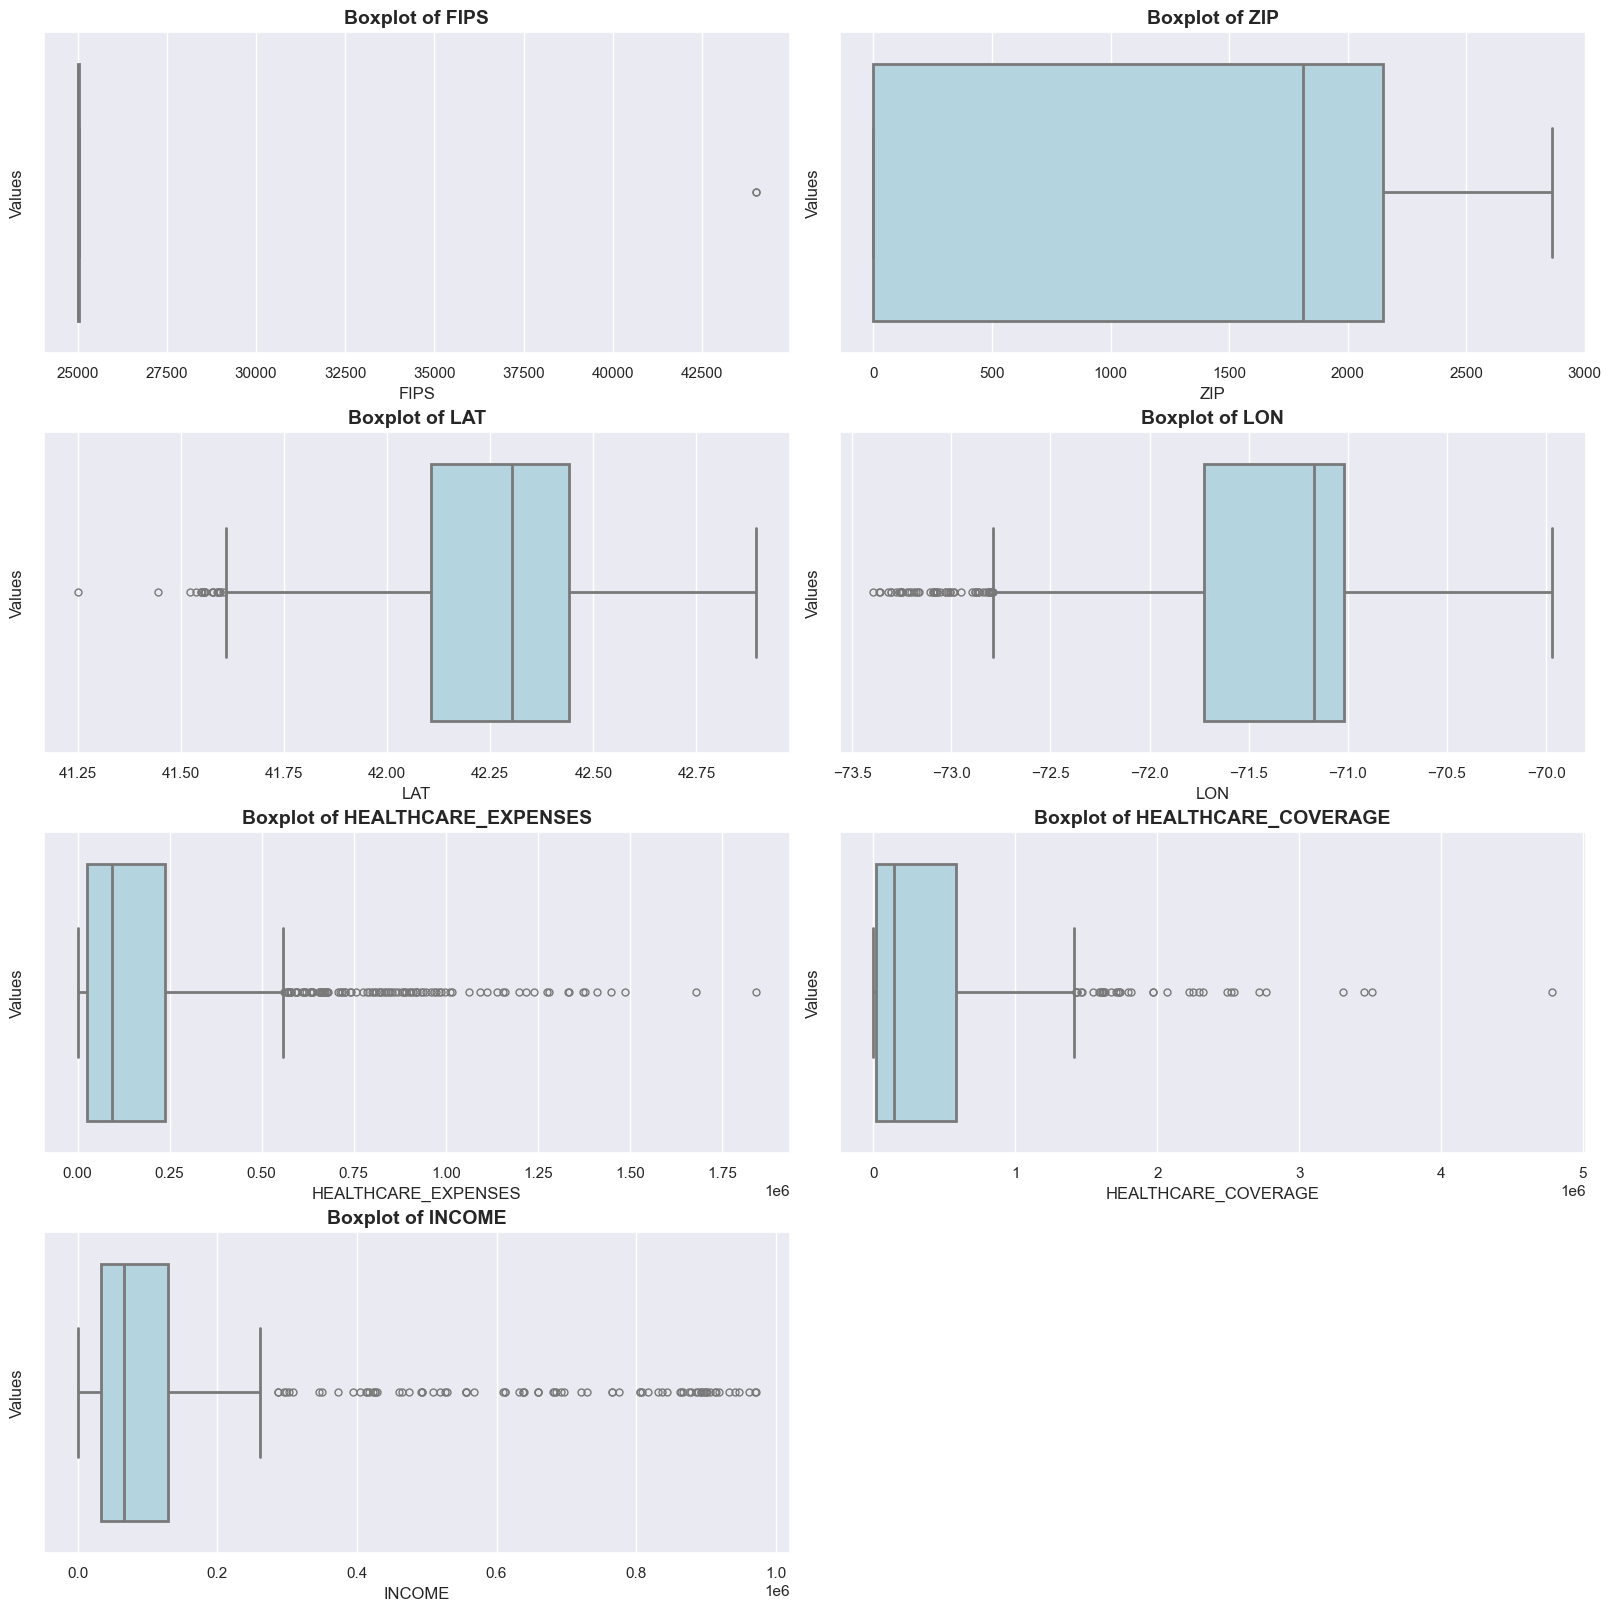

In [83]:
plot_boxplots(patients)

## Patients EDA

In [ ]:
file_location = explore_csv(patients, name="Patients", output_path="./eda_reports")
print(f"EDA report written to: {file_location}")

### Removing Columns: Rationale

In this analysis, we need to focus on the data that will provide valuable insights into clinical care gaps, patient-level insights, and population health management. Certain columns in the dataset are either irrelevant or could introduce privacy issues. Below is the rationale for removing specific columns:

1. Non-Clinical Information
   - Fields like `SSN`, `DRIVERS`, `PASSPORT`, `FIRST`, `MIDDLE`, `LAST`, `MAIDEN`, `PREFIX`, and `SUFFIX`:
     These columns primarily contain personal identifiers or demographic information that doesn't provide direct clinical insights or value for our project. Retaining these columns could clutter the analysis and make it more difficult to focus on relevant clinical data.
     
2. Personally Identifiable Information (PII)
   - Columns like `SSN` and `ADDRESS`:
     These columns contain sensitive personally identifiable information (PII), which should be avoided in any public or analytical context to maintain privacy and comply with regulations (e.g., HIPAA). Excluding these columns ensures that our analysis adheres to ethical standards and protects patient privacy.

3. Irrelevant for the Use Case
   - Data fields like `BIRTHPLACE` and `FIPS`:
     These columns do not align with the primary goals of the project, which is to identify care gaps, track clinical compliance, and provide patient-level insights. Unless specifically needed for a certain geographical analysis, these fields do not contribute meaningfully to understanding care patterns or patient outcomes.
     
By removing these columns, we will focus on the data that directly supports the goals of tracking clinical care, improving health management, and providing actionable insights for healthcare stakeholders.
